In [2]:

import pandas as pd
import matplotlib.pyplot as plt

We load the database in a dataframe

In [3]:
df=pd.read_csv("Colombia_COVID19_Coronavirus_casos_diarios.csv")

We create a copy of the data and organize them

In [4]:
#creamos copia de los datos
df_max_scaled=df.copy()
df_max_scaled["norm_new_cases"]=df_max_scaled["NUEVOS_CASOS"]/df_max_scaled["NUEVOS_CASOS"].abs().max()
#importante organizar los datos de menor a mayor

The required kernel function and its associated filter are created as for Gaussian

In [5]:
import numpy as np

def epanechnikov_filter(data, bandwidth):
    # Crear el kernel de Epanechnikov
    size = int(4 * bandwidth + 0.5)
    size = size + 1 if size % 2 == 0 else size
    kernel = epanechnikov_kernel(size, bandwidth)
    
    # convolución
    smoothed_data = np.convolve(data, kernel, mode='same')
    
    return smoothed_data

def epanechnikov_kernel(size, bandwidth):
    x = np.linspace(-(size // 2), size // 2, size)
    kernel = np.where(np.abs(x) <= bandwidth, 0.75 * (1 - (x / bandwidth) ** 2) / bandwidth, 0)
    kernel = kernel / np.sum(kernel)  # Normalizar el kernel
    
    return kernel


We enter a bandwidth that allows us to appreciate the smoothing of the data and we apply the filter

In [8]:
h=10
df_max_scaled["epanechnikov_smoothed"]=epanechnikov_filter(df_max_scaled["norm_new_cases"],h)

We plot the data and the smoothing curve

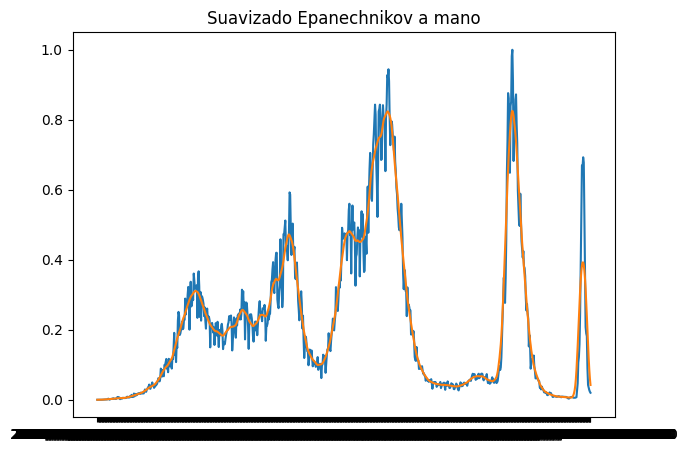

In [9]:
plt.figure(figsize=(7,5))
plt.plot(df_max_scaled["FECHA_ACTUALIZACION"],df_max_scaled["norm_new_cases"])
plt.plot(df_max_scaled["FECHA_ACTUALIZACION"],df_max_scaled["epanechnikov_smoothed"])
plt.title("Suavizado Epanechnikov a mano")
plt.show()